# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

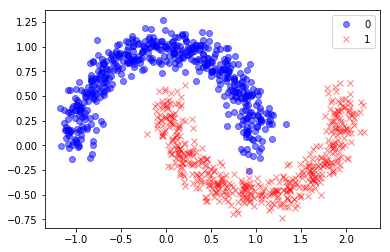

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [4]:
X.shape

(1000, 2)

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Shallow Model

In [89]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [90]:
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
700/700 [==============================] - 0s 357us/step - loss: 0.4604 - acc: 0.8100
Epoch 2/200
700/700 [==============================] - 0s 45us/step - loss: 0.2959 - acc: 0.8943
Epoch 3/200
700/700 [==============================] - 0s 44us/step - loss: 0.2535 - acc: 0.8871
Epoch 4/200
700/700 [==============================] - 0s 23us/step - loss: 0.2416 - acc: 0.8871
Epoch 5/200
700/700 [==============================] - 0s 45us/step - loss: 0.2365 - acc: 0.8857
Epoch 6/200
700/700 [==============================] - 0s 22us/step - loss: 0.2324 - acc: 0.8886
Epoch 7/200
700/700 [==============================] - 0s 45us/step - loss: 0.2299 - acc: 0.8871
Epoch 8/200
700/700 [==============================] - 0s 22us/step - loss: 0.2291 - acc: 0.8886
Epoch 9/200
700/700 [==============================] - 0s 45us/step - loss: 0.2285 - acc: 0.8843
Epoch 10/200
700/700 [==============================] - 0s 22us/step - loss: 0.2260 - acc: 0.8871
Epoch 11/200
700/700 [======

700/700 [==============================] - 0s 23us/step - loss: 0.2257 - acc: 0.8886
Epoch 85/200
700/700 [==============================] - 0s 45us/step - loss: 0.2255 - acc: 0.8871
Epoch 86/200
700/700 [==============================] - 0s 22us/step - loss: 0.2258 - acc: 0.8886
Epoch 87/200
700/700 [==============================] - 0s 22us/step - loss: 0.2242 - acc: 0.8886
Epoch 88/200
700/700 [==============================] - 0s 45us/step - loss: 0.2249 - acc: 0.8871
Epoch 89/200
700/700 [==============================] - 0s 23us/step - loss: 0.2240 - acc: 0.8886
Epoch 90/200
700/700 [==============================] - 0s 22us/step - loss: 0.2252 - acc: 0.8900
Epoch 91/200
700/700 [==============================] - 0s 44us/step - loss: 0.2251 - acc: 0.8857
Epoch 92/200
700/700 [==============================] - 0s 238us/step - loss: 0.2251 - acc: 0.8886
Epoch 93/200
700/700 [==============================] - 0s 18us/step - loss: 0.2249 - acc: 0.8914
Epoch 94/200
700/700 [==========

Epoch 167/200
700/700 [==============================] - 0s 67us/step - loss: 0.2251 - acc: 0.8900
Epoch 168/200
700/700 [==============================] - 0s 43us/step - loss: 0.2251 - acc: 0.8900
Epoch 169/200
700/700 [==============================] - 0s 43us/step - loss: 0.2280 - acc: 0.8871
Epoch 170/200
700/700 [==============================] - 0s 27us/step - loss: 0.2249 - acc: 0.8857
Epoch 171/200
700/700 [==============================] - 0s 22us/step - loss: 0.2246 - acc: 0.8886
Epoch 172/200
700/700 [==============================] - 0s 22us/step - loss: 0.2242 - acc: 0.8886
Epoch 173/200
700/700 [==============================] - 0s 44us/step - loss: 0.2255 - acc: 0.8900
Epoch 174/200
700/700 [==============================] - 0s 23us/step - loss: 0.2249 - acc: 0.8886
Epoch 175/200
700/700 [==============================] - 0s 21us/step - loss: 0.2245 - acc: 0.8886
Epoch 176/200
700/700 [==============================] - 0s 23us/step - loss: 0.2246 - acc: 0.8886
Epoch 177/

In [91]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 705us/step


In [92]:
results

[0.3181528107325236, 0.8466666674613953]

In [93]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.847


In [94]:
amin, bmin = X.min(axis=0) - 0.1
amax, bmax = X.max(axis=0) + 0.1
hticks = np.linspace(amin, amax, 101)
vticks = np.linspace(bmin, bmax, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
aa.shape
c = model.predict(ab)
cc = c.reshape(aa.shape)
len(cc)
cc
cc[1]

#c

array([0.98565346, 0.9862917 , 0.9869018 , 0.9874851 , 0.9880427 ,
       0.9885759 , 0.9890854 , 0.98957247, 0.99003816, 0.99048305,
       0.9909083 , 0.9913148 , 0.99170333, 0.9920745 , 0.9924292 ,
       0.99276817, 0.99309206, 0.99340147, 0.9936972 , 0.9939798 ,
       0.9942497 , 0.9945076 , 0.99475396, 0.99498934, 0.9952142 ,
       0.99542916, 0.9956344 , 0.9958305 , 0.99601775, 0.9961966 ,
       0.9963676 , 0.99653083, 0.99668676, 0.99683565, 0.9969779 ,
       0.9971138 , 0.99724364, 0.9973677 , 0.997486  , 0.9975992 ,
       0.9977071 , 0.9978103 , 0.99790895, 0.99800295, 0.99809283,
       0.9981787 , 0.9982608 , 0.99833906, 0.9984138 , 0.99848527,
       0.99855345, 0.9986186 , 0.9986808 , 0.99874026, 0.99879694,
       0.9988512 , 0.9989029 , 0.9989524 , 0.99899954, 0.9990446 ,
       0.9990877 , 0.99912876, 0.99916804, 0.9992055 , 0.99924135,
       0.9992755 , 0.9993082 , 0.9993393 , 0.9993692 , 0.9993975 ,
       0.9994247 , 0.9994506 , 0.9994754 , 0.9994991 , 0.99952

In [95]:
nx, ny = (3, 3)
x = np.linspace(0, 1, nx)
print(x)
y = np.linspace(0, 1, ny)
print(y)
xv, yv = np.meshgrid(x, y)
print(xv)
print(yv)

[0.  0.5 1. ]
[0.  0.5 1. ]
[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [96]:
x=np.c_[xv.ravel(),yv.ravel()]
len(x)

9

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 3

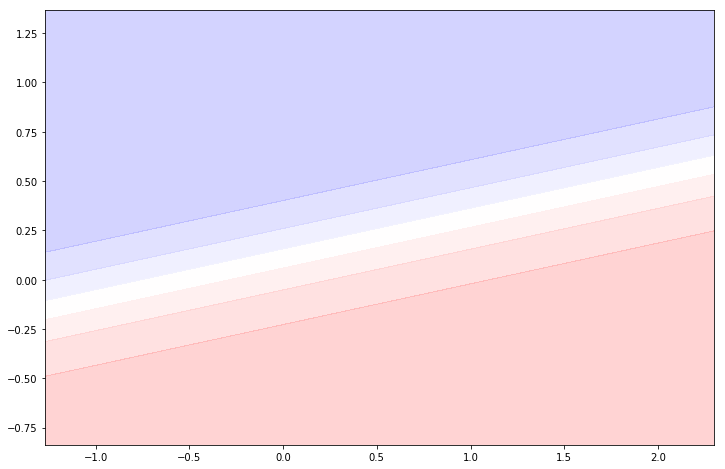

In [102]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

In [74]:
X

array([[ 2.04271531,  0.51812416],
       [ 1.72033708, -0.13233804],
       [-0.26386729,  0.76382643],
       ...,
       [ 0.33823662, -0.43099924],
       [ 0.1269428 ,  0.09966251],
       [ 0.54241537, -0.47450809]])

In [43]:
c

NameError: name 'c' is not defined

### Deep model

In [75]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [76]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [77]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 342us/step


[0.009650875190272927, 0.9966666666666667]

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [79]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	0.997


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 3

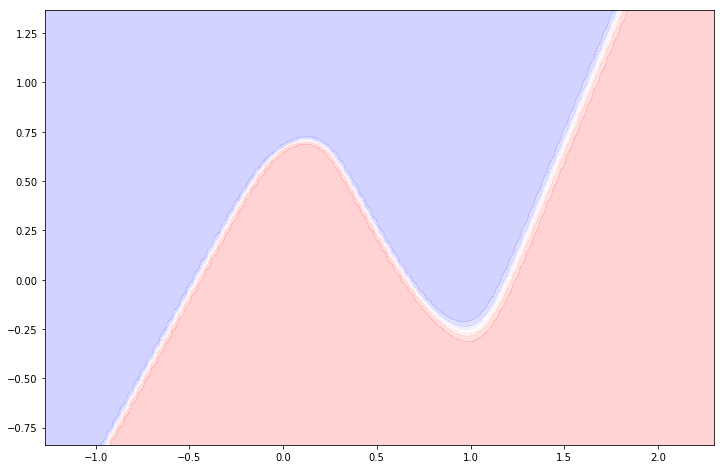

In [85]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [104]:
import os
os.chdir('C:\\Users\\Administrator\\Desktop\\Data')
df = pd.read_csv('iris.csv')

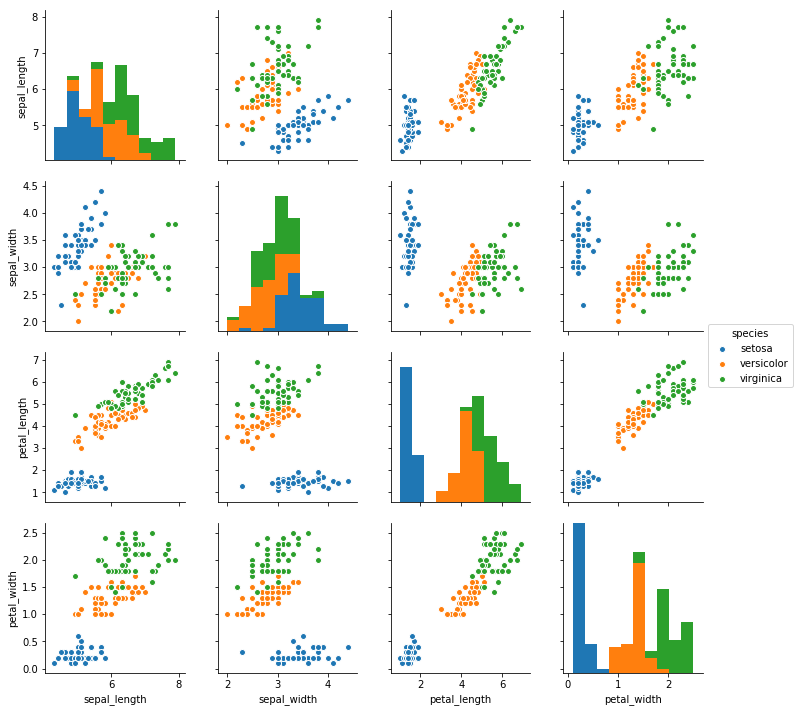

In [105]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [106]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [107]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [108]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [109]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [110]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [111]:
from keras.utils.np_utils import to_categorical

In [112]:
y_cat = to_categorical(y)

In [113]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [115]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [116]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 0s 3ms/step - loss: 2.2781 - acc: 0.5833 - val_loss: 0.8332 - val_acc: 0.5833
Epoch 2/20
108/108 [==============================] - 0s 152us/step - loss: 1.6715 - acc: 0.3333 - val_loss: 0.6314 - val_acc: 0.5833
Epoch 3/20
108/108 [==============================] - 0s 91us/step - loss: 0.8685 - acc: 0.6111 - val_loss: 1.5089 - val_acc: 0.4167
Epoch 4/20
108/108 [==============================] - 0s 90us/step - loss: 0.7701 - acc: 0.7222 - val_loss: 0.5186 - val_acc: 0.6667
Epoch 5/20
108/108 [==============================] - 0s 82us/step - loss: 0.6692 - acc: 0.6667 - val_loss: 0.3676 - val_acc: 0.8333
Epoch 6/20
108/108 [==============================] - 0s 91us/step - loss: 0.5438 - acc: 0.7222 - val_loss: 0.6457 - val_acc: 0.6667
Epoch 7/20
108/108 [==============================] - 0s 90us/step - loss: 0.5475 - acc: 0.6944 - val_loss: 0.6391 - val_acc: 0.5833
Epoch 8/20
108/108 [====

In [117]:
y_pred = model.predict(X_test)

In [118]:
y_pred[:5]

array([[9.7412699e-01, 2.5481962e-02, 3.9105082e-04],
       [9.5534670e-01, 4.3562952e-02, 1.0903801e-03],
       [3.3529136e-02, 5.6227636e-01, 4.0419450e-01],
       [2.6395608e-02, 7.1832693e-01, 2.5527751e-01],
       [8.6255246e-01, 1.3475323e-01, 2.6943018e-03]], dtype=float32)

In [120]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [121]:
from sklearn.metrics import classification_report

In [122]:
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.92      0.92      0.92        12
          2       0.86      0.86      0.86         7

avg / total       0.93      0.93      0.93        30



In [123]:
confusion_matrix(y_test_class, y_pred_class)

array([[11,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  6]], dtype=int64)

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

## Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need do understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.
